### Basic of DeepLearning

In [2]:
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/x09.txt'
raw_data = np.genfromtxt(url, skip_header=36)

raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
xs = np.array(raw_data[:, 2], dtype=np.float32)
ys = np.array(raw_data[:, 3], dtype=np.float32)
zs = np.array(raw_data[:, 4], dtype=np.float32)


In [24]:
def draw3D():
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(xs, ys, zs)
    ax.set_xlabel('Weight')
    ax.set_ylabel('Age')
    ax.set_zlabel('Blood fat')
    ax.view_init(15, 15)
    plt.show()


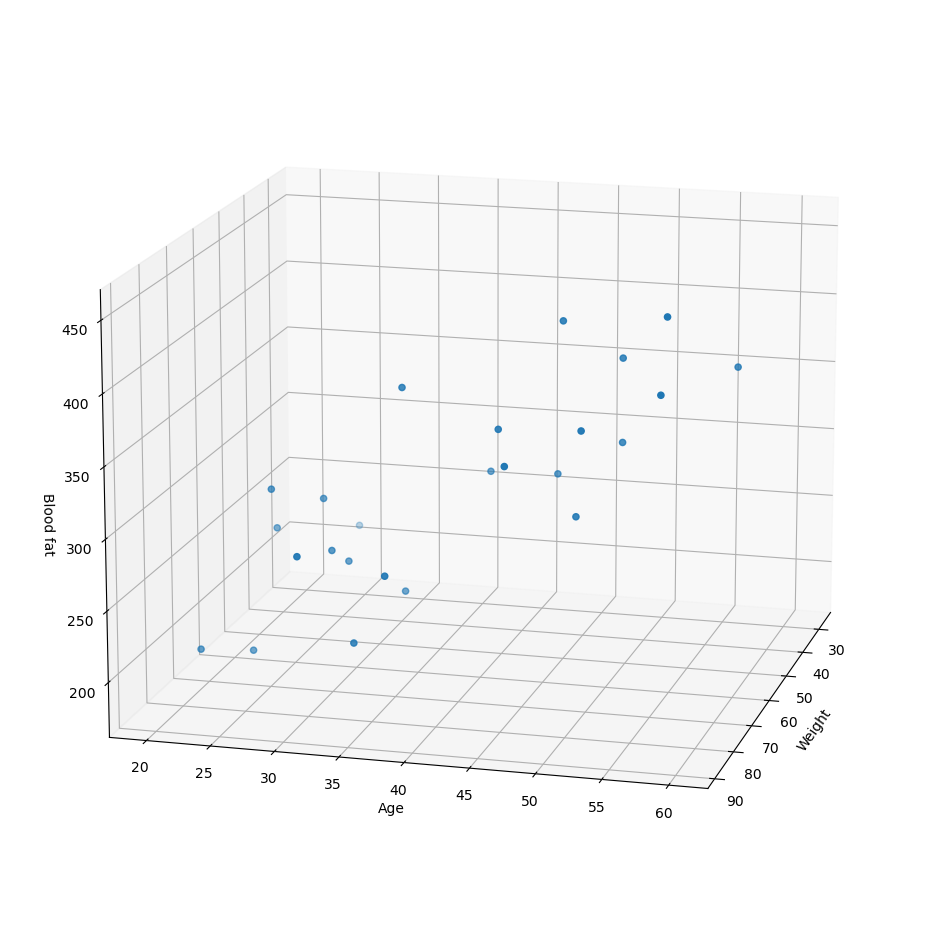

In [25]:
draw3D()

### 간단한 딥러닝 
#### 목적 : 나이와 몸무게를 입력하면 blood fat 출력 
#### x1, x2를 입력해서 y가 나오게하는 Weight와 bias를 구하는 것 
 
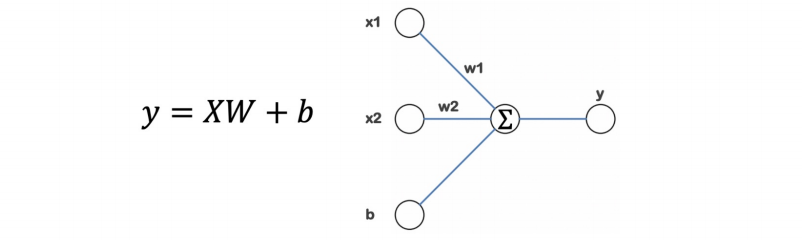

In [8]:
x_data = np.array(raw_data[:, 2:4], dtype=np.float32)
y_data = np.array(raw_data[:, 4], dtype=np.float32)


In [9]:
# 몸무게, 나이 
x_data

array([[84., 46.],
       [73., 20.],
       [65., 52.],
       [70., 30.],
       [76., 57.],
       [69., 25.],
       [63., 28.],
       [72., 36.],
       [79., 57.],
       [75., 44.],
       [27., 24.],
       [89., 31.],
       [65., 52.],
       [57., 23.],
       [59., 60.],
       [69., 48.],
       [60., 34.],
       [79., 51.],
       [75., 50.],
       [82., 34.],
       [59., 46.],
       [67., 23.],
       [85., 37.],
       [55., 40.],
       [63., 30.]], dtype=float32)

In [10]:
# blood fat
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

In [11]:
print('x shape : {}'.format(x_data.shape))
print('y shape : {}'.format(y_data.shape))


x shape : (25, 2)
y shape : (25,)


#### Dimension 맞추기
y_data는 (25,) 형태이고 x_data는 (25,2) 형태이다. 

y_data를 (25,1)로 reshape하여 차원을 맞춰준다. 


In [12]:
y_data = y_data.reshape((25,1))
y_data

array([[354.],
       [190.],
       [405.],
       [263.],
       [451.],
       [302.],
       [288.],
       [385.],
       [402.],
       [365.],
       [209.],
       [290.],
       [346.],
       [254.],
       [395.],
       [434.],
       [220.],
       [374.],
       [308.],
       [220.],
       [311.],
       [181.],
       [274.],
       [303.],
       [244.]], dtype=float32)

#### 모델 만들기

In [13]:
import tensorflow as tf

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape = (2,)) #입력 차원이 2인 데이터를 받아 하나의 출력을 내는 간단한 신경망 모델 
])

#### loss 함수 
손실 함수(loss function)는 딥러닝 모델의 학습 과정에서 모델의 출력값과 실제값 사이의 차이를 계산하는 함수이다.

간단히 말해서 정답까지 얼마나 멀리 있는지를 측정하는 함수 

학습 중에 손실 함수의 값을 최소화하는 방향으로 모델의 가중치와 편향을 조정하여 모델을 학습시킨다. 

손실 함수는 주어진 문제의 특성에 따라 선택되며, 다양한 손실 함수가 있으나 이번에는 평균 제곱 오차(Mean Squared Error, MSE) 사용

#### 옵티마이저 
옵티마이저(optimizer)는 딥러닝 모델의 학습 과정에서 손실 함수를 최적화하기 위해 사용되는 알고리즘이다.

옵티마이저는 모델의 가중치와 편향을 조정하여 손실 함수를 최소화하는 방향으로 모델을 업데이트 한다.


In [15]:
model.compile(optimizer = 'rmsprop', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


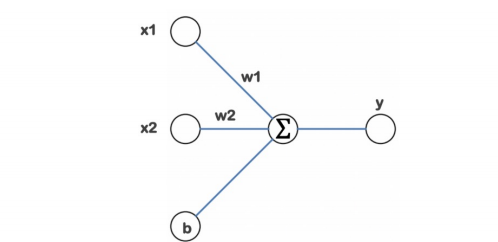

#### 모델 학습하기 
**epochs** : 학습 알고리즘이 주어진 데이터셋을 몇 번 반복해서 학습하는지를 결정하는 하이퍼파라미터.

모델이 한 epoch을 마치면 모든 학습 데이터를 한 번씩 사용하여 업데이트를 수행하고, 새로운 가중치를 계산합니다. 

이러한 과정은 모델이 데이터의 패턴을 학습하고 예측을 개선하는 데 도움을 준다. 

epochs 값을 크게 설정하면 모델은 더 많은 학습 반복을 수행하며 데이터에 더 적합해질 수 있으나 epochs 값을 너무 크게 설정하면 <b>과적합(overfitting)</b>의 위험이 있을 수 있으므로 주의해야 한다.

epochs 값은 적절한 값으로 조정하는 것이 중요하며, 이는 실험과 검증을 통해 결정해야 한다.

_과적합 : 모델이 훈련 데이터에 너무 맞춰져 다른 데이터에 대한 일반화 성능이 떨어지는 현상._

In [17]:
hist = model.fit(x_data, y_data, epochs=2500)

Epoch 1/2500
1/1 [==============================] - 1s 962ms/step - loss: 48976.9961
Epoch 2/2500
1/1 [==============================] - 0s 11ms/step - loss: 48827.0312
Epoch 3/2500
1/1 [==============================] - 0s 12ms/step - loss: 48718.4688
Epoch 4/2500
1/1 [==============================] - 0s 14ms/step - loss: 48627.7031
Epoch 5/2500
1/1 [==============================] - 0s 13ms/step - loss: 48547.2383
Epoch 6/2500
1/1 [==============================] - 0s 16ms/step - loss: 48473.5859
Epoch 7/2500
1/1 [==============================] - 0s 19ms/step - loss: 48404.7969
Epoch 8/2500
1/1 [==============================] - 0s 14ms/step - loss: 48339.6641
Epoch 9/2500
1/1 [==============================] - 0s 19ms/step - loss: 48277.3867
Epoch 10/2500
1/1 [==============================] - 0s 17ms/step - loss: 48217.3789
Epoch 11/2500
1/1 [==============================] - 0s 15ms/step - loss: 48159.2383
Epoch 12/2500
1/1 [==============================] - 0s 12ms/step - loss:

#### ehpocs 를 반복할수록 loss점점 줄어든다 

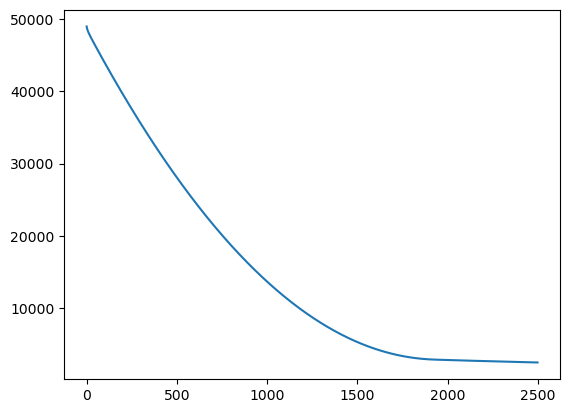

In [21]:
plt.plot(hist.history['loss']);


In [22]:
model.predict(np.array([100,44]).reshape(1,2)) #100kg 44살 blood fat 추측 

1/1 [==============================] - 0s 120ms/step


array([[399.17593]], dtype=float32)

#### 가중치와 bias 확인

In [23]:
W_, b_ = model.get_weights()
W_, b_

(array([[2.3759224],
        [3.6161911]], dtype=float32),
 array([2.4712954], dtype=float32))

#### y = XW + b 확인

In [26]:
x = np.linspace(20, 100, 50).reshape(50,1) 
y = np.linspace(10, 70, 50).reshape(50,1) 

X = np.concatenate((x, y), axis=1)
Z = np.matmul(X, W_) + b_ 

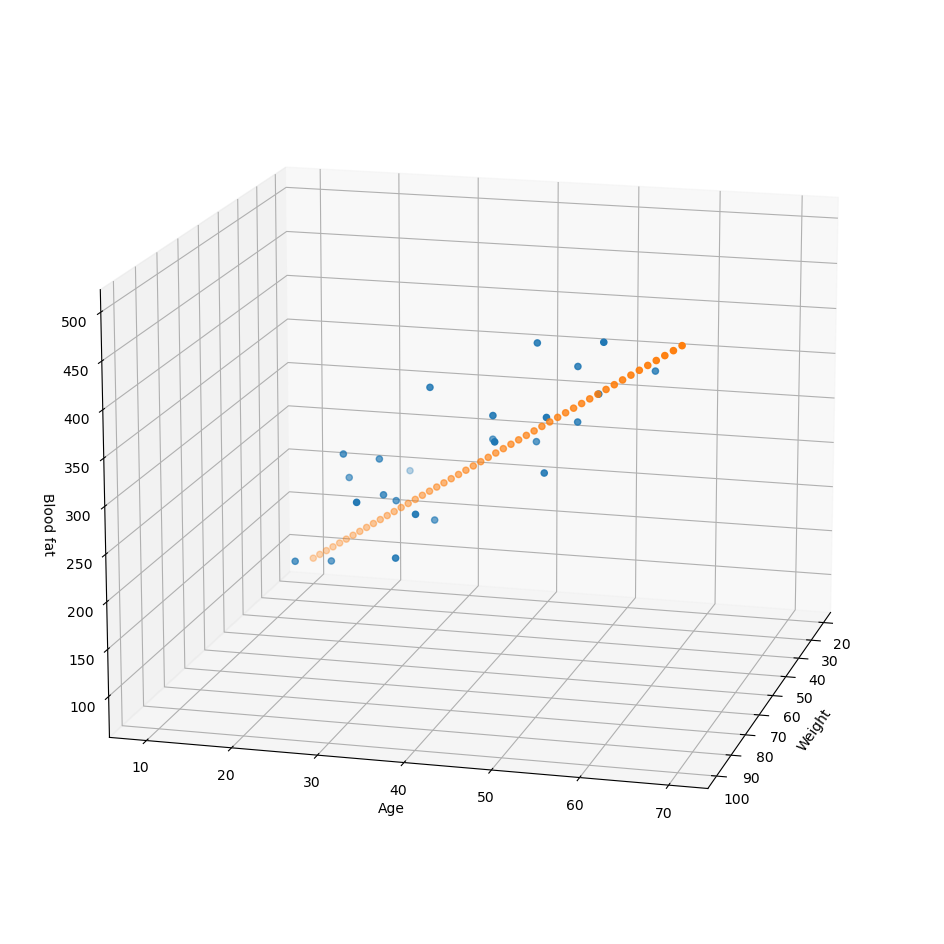

In [27]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
ax.scatter(x, y, Z)
plt.show()
